### Import Libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split


### Create Model

Text(0, 0.5, 'sensitivity')

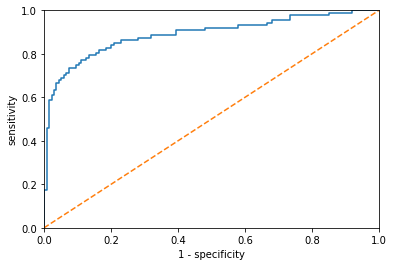

In [6]:


df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses',
        'Parents/Children', 'Fare']].values
y = df['Survived'].values


X_train, X_test, y_train, y_test = train_test_split(X, y)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])


plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')


In [7]:
print("model AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

model AUC score: 0.8888037462750107
